In [72]:
#import Library

import pandas as pd

df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [73]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


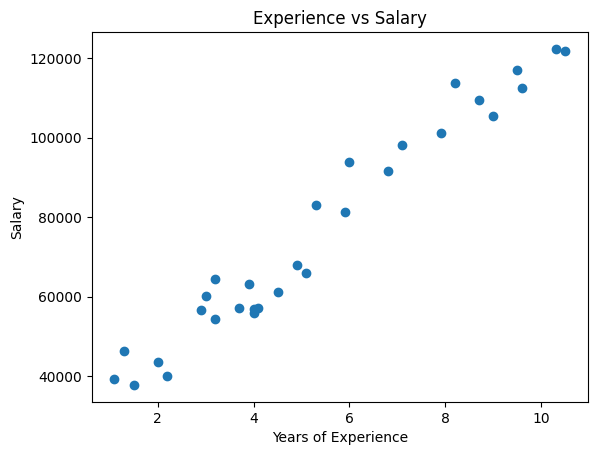

In [75]:
#Visualisasi untuk melihat persebaran data 
import matplotlib.pyplot as plt

plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

In [76]:
#import library untuk split data menjadi X train & y train dan X test & y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)


#Reshape data untuk menyamakan range nilai data X dan y
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [77]:
len(X_train)

21

In [78]:
len(X_test)

9

In [79]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linear sederhana
reg = LinearRegression()

#Fitting model regresi pada data train
reg.fit(X_train, y_train)

#Prediksi dari data test 
y_predict = reg.predict(X_test)

y_predict

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

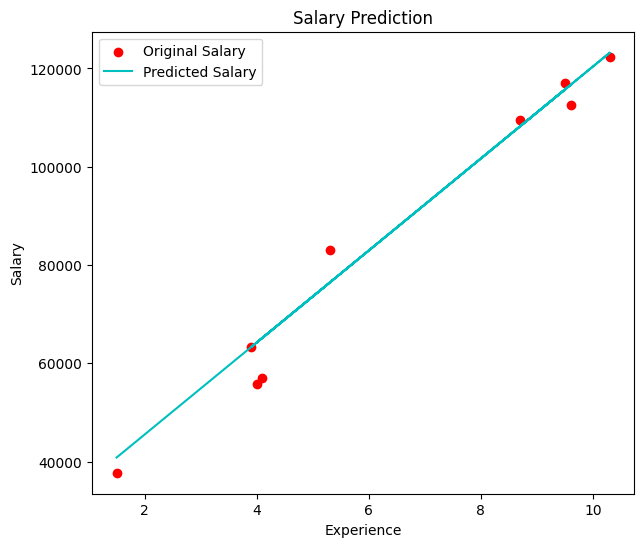

In [80]:
#Visualisasi untuk melihat ketepatan prediksi terhadap data actual

plt.figure(figsize = (7, 6))
plt.scatter(X_test, y_test, color = "r")
plt.plot(X_test, y_predict, color = "c")
plt.title("Salary Prediction")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend(["Original Salary", "Predicted Salary"])
plt.show()

In [81]:
#Meninjau seberapa besar error yang dihasilkan dari prediksi terhadap data actual
error_data = y_test - y_predict

error_data

array([[-3086.78327049],
       [ -797.08258899],
       [-8073.46261459],
       [  -64.41035735],
       [ 1269.12643996],
       [ 1219.33546892],
       [-4000.89968866],
       [-8424.43648597],
       [ 6701.22384198]])

In [82]:
from sklearn.metrics import r2_score, mean_squared_error

# calculation the mean square error

mean_SE = mean_squared_error(y_test, y_predict)

# calculation r-square value
rscore = r2_score(y_test, y_predict)

print(f"Mean Squared Value : {mean_SE}\nr score Value : {rscore}")

Mean Squared Value : 23370078.800832972
r score Value : 0.9740993407213511


In [83]:
print(f"Intercept {reg.intercept_}")
print(f"Coefficient {reg.coef_}")

Intercept [26777.3913412]
Coefficient [[9360.26128619]]


In [84]:
#Uji Coba Prediksi Salary berdasarkan Years of Experience

new_data = pd.DataFrame({
                          'Years of Experience': [2, 9, 3, 1]})

#Prediksi Salary dari data baru yang diberikan
new_pred = reg.predict(new_data)
new_pred

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 45497.91391358],
       [111019.74291694],
       [ 54858.17519978],
       [ 36137.65262739]])

In [85]:
#Data sebelum ditambahkan kolom Salary hasil prediksi
new_data

,Years of Experience
0,2
1,9
2,3
3,1


In [86]:
#Data setelah ditambahkan kolom Salary hasil prediksi berdasarkan Years of Experience
new_data.insert(1, 'Salary', new_pred)

new_data

,Years of Experience,Salary
0,2,45497.913914
1,9,111019.742917
2,3,54858.175200
3,1,36137.652627


**DONE :)**